<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#The-ica_data-Object" data-toc-modified-id="The-ica_data-Object-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The ica_data Object</a></span><ul class="toc-item"><li><span><a href="#Viewing-raw-data" data-toc-modified-id="Viewing-raw-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Viewing raw data</a></span></li><li><span><a href="#Component-Naming" data-toc-modified-id="Component-Naming-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Component Naming</a></span></li><li><span><a href="#Genome-Annotation" data-toc-modified-id="Genome-Annotation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Genome Annotation</a></span></li><li><span><a href="#I-modulons" data-toc-modified-id="I-modulons-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>I-modulons</a></span></li><li><span><a href="#TRN" data-toc-modified-id="TRN-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>TRN</a></span></li></ul></li><li><span><a href="#Regulon-Enrichments" data-toc-modified-id="Regulon-Enrichments-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regulon Enrichments</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plotting</a></span><ul class="toc-item"><li><span><a href="#Plot-Genes" data-toc-modified-id="Plot-Genes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plot Genes</a></span></li><li><span><a href="#Plot-Sample-Bar-Chart" data-toc-modified-id="Plot-Sample-Bar-Chart-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Plot Sample Bar Chart</a></span></li><li><span><a href="#Regulon-Plots" data-toc-modified-id="Regulon-Plots-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Regulon Plots</a></span><ul class="toc-item"><li><span><a href="#Regulon-Histogram" data-toc-modified-id="Regulon-Histogram-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Regulon Histogram</a></span></li><li><span><a href="#Regulon-Venn" data-toc-modified-id="Regulon-Venn-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Regulon Venn</a></span></li><li><span><a href="#Regulon-Scatter" data-toc-modified-id="Regulon-Scatter-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Regulon Scatter</a></span></li></ul></li><li><span><a href="#Plot-Metabolic-Pathways" data-toc-modified-id="Plot-Metabolic-Pathways-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Plot Metabolic Pathways</a></span></li></ul></li></ul></div>

# Setup

In [1]:
# Import ICA plotting
import sys
sys.path.append('../')
from icaviz.plotting import *

# Set plotting style
import seaborn
sns.set_style('ticks')

# The ica_data Object

The `ica_data` object stores all the important information about your data and your i-modulons.

The following arguments are required:
* X: log(TPM+1) file
* S: Components from ICA
* A: Mixing matrix from ICA
* metadata: Metadata table

The following arguments are optional, but recommended:
* annotation: Genome annotation table
* TRN: Regulator binding information
* names: Custom names for your components

In [2]:
DATA_DIR = 'data/precise_data/'
ANNOTATION_DIR = 'data/annotation/'
ica_data = load_data(X=DATA_DIR+'log_tpm.csv',
                     S=DATA_DIR+'S.csv',
                     A=DATA_DIR+'A.csv',
                     metadata=DATA_DIR+'metadata.csv',
                     # Optional
                     annotation=ANNOTATION_DIR+'gene_info.csv',
                     trn=ANNOTATION_DIR+'TRN.csv')

## Viewing raw data

The X, S, and A attributes in `ica_data` hold your TPM data, components, and mixing matrices, respectively.

In [3]:
ica_data.X.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
b0002,11.006653,11.130196,11.704951,11.888217,11.064810,10.779071,9.976401,10.291135,11.229767,11.214065,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.415654,10.523138,11.423835,11.803781,10.776984,10.597810,9.596833,10.191503,10.897938,10.861157,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.594871,10.725062,10.457270,10.779162,10.394971,10.113950,8.741617,9.082231,10.185151,10.164655,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.316102,6.258499,5.422129,5.336121,6.716069,6.410864,4.626949,4.756153,6.527653,6.136168,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.915771,6.897597,6.775645,6.782605,6.761813,6.816532,6.686767,6.860036,6.862147,6.817480,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213


In [4]:
ica_data.S.head()

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
b0002,0.072693,-0.006320,-0.038374,-0.010045,-0.004345,-0.005599,0.009043,-0.005072,-0.012186,-0.013543,...,-0.010152,-0.012124,-0.012027,-0.002123,-0.000036,-0.013667,-0.018883,0.004408,-0.006315,-0.001780
b0003,0.015975,-0.009969,-0.024571,-0.006775,-0.003583,0.006680,-0.010841,-0.012620,-0.003685,0.003512,...,0.004702,0.004402,0.001182,-0.004415,-0.001514,-0.005052,0.015502,0.000860,-0.022438,-0.020087
b0004,0.015319,-0.003808,-0.027018,-0.004455,-0.008418,0.003245,-0.016494,-0.013818,-0.008104,0.002144,...,0.003507,0.005342,0.003759,0.000700,0.001859,-0.002344,0.016263,0.002486,-0.016565,-0.014142
b0005,0.008229,-0.000685,-0.005215,-0.002029,-0.028069,0.014748,-0.019240,-0.002403,-0.008507,-0.019092,...,-0.006856,0.010676,0.008874,0.018497,0.000700,-0.013267,0.015265,0.016886,-0.015319,-0.020727
b0006,-0.004941,-0.001849,-0.002326,0.006075,0.001607,0.009678,0.001661,0.003754,-0.000152,-0.001013,...,-0.014761,0.005071,0.001496,-0.002506,-0.002819,0.005800,0.003975,-0.010976,-0.008756,0.006169


In [5]:
ica_data.A.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
0,0.076035,-0.076035,1.483992,1.719034,-1.184220,-1.350203,1.451882,1.329577,0.265718,0.024864,...,-0.892372,-1.022146,0.253722,-0.880352,0.526509,1.261740,1.727782,1.512944,2.584012,2.787686
1,-0.408568,0.408568,1.760680,1.357274,-0.446482,-0.931725,0.517458,0.427993,-0.499529,-0.581335,...,1.781224,2.785099,0.439133,-0.015471,0.366544,0.369589,0.325470,1.027508,1.629269,2.154717
2,0.103912,-0.103912,0.847276,1.530875,0.258492,0.188903,1.232846,0.883215,0.505356,0.132219,...,1.422466,2.396554,2.130935,1.656316,0.864338,0.093698,0.641705,1.306455,1.366912,2.452061
3,-0.456843,0.456843,5.890468,6.051415,-0.914670,-1.087245,5.210846,5.028641,3.820172,3.961980,...,-2.343743,-1.991048,3.520794,3.105551,6.620301,5.400225,5.545880,5.555621,9.672308,10.109228
4,0.269057,-0.269057,-0.254271,0.184537,0.651527,0.691914,0.016636,-0.465781,1.212097,1.122801,...,-3.646464,-3.606055,-0.665810,-0.830586,-1.044574,0.119876,-0.045670,-0.826608,-1.393160,-1.587978


The metadata file should be structured with columns such as:
* Strain Description
* Temperature (C)
* Base Media
* Carbon Source (g/L)
* Nitrogen Source (g/L)
* Electron Acceptor
* Trace Element Mixture
* Supplement
* pH
* Antibiotic
* Culture Type
* Growth Rate (1/hr)

In [6]:
ica_data.metadata.head()

,study,project_id,condition_id,rep_id,contact,library creator,run_date,Strain Description,Strain,Base Media,...,Sequencing Machine,Additional Details,Biological Replicates,R1,R2,BAM,alignment,DOI,GEO,Public
sample_id,,,,,,,,,,,,,,,,,,,,,
control__wt_glc__1,Control,control,wt_glc,1,Sangwoo Seo,Sangwoo Seo,04/17/13,Escherichia coli K-12 MG1655,MG1655,M9,...,MiSeq,NaN,2,control/MG1655-M9-glucose-1_S1_L001_R1_001.fas...,control/MG1655-M9-glucose-1_S1_L001_R2_001.fas...,control__wt_glc__1.bam,94.33,doi.org/10.1101/080929,GSE65643,1
control__wt_glc__2,Control,control,wt_glc,2,Sangwoo Seo,Sangwoo Seo,04/17/13,Escherichia coli K-12 MG1655,MG1655,M9,...,MiSeq,NaN,2,control/MG1655-M9-glucose-2_S2_L001_R1_001.fas...,control/MG1655-M9-glucose-2_S2_L001_R2_001.fas...,control__wt_glc__2.bam,94.24,doi.org/10.1101/080929,GSE65643,1
fur__wt_dpd__1,Fur,fur,wt_dpd,1,Sangwoo Seo,Sangwoo Seo,10/02/13,Escherichia coli K-12 MG1655,MG1655,M9,...,MiSeq,NaN,2,fur/WTDPD1_S1_L001_R1_001.fastq.gz,fur/WTDPD1_S1_L001_R2_001.fastq.gz,fur__wt_dpd__1.bam,98.04,doi.org/10.1038/ncomms5910,GSE54900,1
fur__wt_dpd__2,Fur,fur,wt_dpd,2,Sangwoo Seo,Sangwoo Seo,10/02/13,Escherichia coli K-12 MG1655,MG1655,M9,...,MiSeq,NaN,2,fur/WTDPD2_S1_L001_R1_001.fastq.gz,fur/WTDPD2_S1_L001_R2_001.fastq.gz,fur__wt_dpd__2.bam,98.30,doi.org/10.1038/ncomms5910,GSE54900,1
fur__wt_fe__1,Fur,fur,wt_fe,1,Sangwoo Seo,Sangwoo Seo,09/05/13,Escherichia coli K-12 MG1655,MG1655,M9,...,MiSeq,NaN,2,fur/WT-Fe2-1_S1_L001_R1_001.fastq.gz,fur/WT-Fe2-1_S1_L001_R2_001.fastq.gz,fur__wt_fe__1.bam,93.35,doi.org/10.1038/ncomms5910,GSE54900,1


## Component Naming

As you begin to characterize your components, you may find it useful to assign names based on regulatory or functional enrichments. You may provide this mapping in a file as a list. Identical names will be automatically corrected by subscripts.

If you do not provide names, the components will be labeled by numbers.

In [7]:
names = pd.read_csv(DATA_DIR+'curated_enrichments.csv',index_col=0)['name']
names.head()

component
0           YieP
1           GlpR
2           YgbI
3    efeU-repair
4        ydcI-KO
Name: name, dtype: object

In [8]:
ica_data = load_data(X=DATA_DIR+'log_tpm.csv',
                       S=DATA_DIR+'S.csv',
                       A=DATA_DIR+'A.csv',
                       metadata=DATA_DIR+'metadata.csv',
                       # Optional
                       annotation=ANNOTATION_DIR+'gene_info.csv',
                       trn=ANNOTATION_DIR+'TRN.csv',
                       names=names)
print(ica_data.names)

['YieP', 'GlpR', 'YgbI', 'efeU-repair', 'ydcI-KO', 'BW25113', 'proVWX', 'DhaR/Mlc', 'ArgR', 'YneJ', 'NarL', 'e14-deletion', 'MalT', 'OxyR', 'Crp-2', 'AtoC', 'PurR-1', 'yheO-KO', 'CsqR', 'MetJ', 'entC-menF-KO', 'uncharacterized-6', 'PurR-2', 'Cbl+CysB', 'GlcC', 'Crp-1', 'YiaJ', 'GcvA', 'XylR', 'fur-KO', 'RpoH', 'GadEWX', 'translation', 'PrpR', 'GadWX', 'fimbriae', 'CecR', 'uncharacterized-4', 'ArcA-1', 'nitrate-related', 'Fnr', 'CdaR', 'Pyruvate', 'SrlR+GutM', 'NagC/TyrR', 'CpxR', 'thrA-KO', 'Lrp', 'deletion-1', 'Leu/Ile', 'deletion-2', 'Fur-1', 'uncharacterized-5', 'Thiamine', 'CysB', 'FliA', 'PuuR', 'NikR', 'NtrC+RpoN', 'RcsAB', 'His-tRNA', 'Fur-2', 'Copper', 'AllR/AraC/FucR', 'Cra', 'ArcA-2', 'EvgA', 'uncharacterized-2', 'Zinc', 'SoxS', 'Nac', 'Tryptophan', 'curli', 'gadWX-KO', 'flu-yeeRS', 'uncharacterized-1', 'FadR/IclR', 'lipopolysaccharide', 'FlhDC', 'crp-KO', 'GntR/TyrR', 'purR-KO', 'RpoS', 'membrane', 'duplication-1', 'uncharacterized-3', 'ExuR/FucR', 'FecI', 'iron-related', 'R

##  Genome Annotation

The genome annotation information is stored in the `gene_info` attribute. The columns are described below, with bold attributes highly recommended:
* start: Left-most position of gene
* stop: Right-most position of gene
* strand: Direction of gene
* **gene_name: Human readable name of gene**
* length: Length of gene
* **product: Description of gene product**
* operon: Group of genes that are cotranscribed
* **cog: COG annotation for gene** (See [EggNOG](http://eggnogdb.embl.de/#/app/downloads) for organism-specific COGs)

In [9]:
ica_data.gene_info.head()

,start,stop,strand,gene_name,length,product,operon,cog
b0002,336,2799,+,thrA,2463,aspartate kinase / homoserine dehydrogenase,"thrL,thrA,thrB,thrC",No COG Annotation
b0003,2800,3733,+,thrB,933,homoserine kinase,"thrL,thrA,thrB,thrC",Amino acid transport and metabolism
b0004,3733,5020,+,thrC,1287,threonine synthase,"thrL,thrA,thrB,thrC",Amino acid transport and metabolism
b0005,5233,5530,+,yaaX,297,putative protein,yaaX,Function unknown
b0006,5682,6459,-,yaaA,777,protein that reduces intracellular iron levels...,yaaA,Function unknown


## I-modulons

To easily identify genes in each i-modulon, use the `show_enriched` method. Depending on what information you provide in the genome annotation, you may see different columns here.

In [10]:
ica_data.show_enriched('GlpR')

,comp,product,gene_name,operon,length,TF
b3925,0.084278,"fructose 1,6-bisphosphatase II",glpX,"glpF,glpK,glpX",1011,"Sigma70,crp,glpR"
b2239,0.211384,"glycerophosphoryl diester phosphodiesterase, p...",glpQ,"glpT,glpQ",1077,"Sigma70,crp,fis,fnr,glpR,ihf,nac"
b3926,0.290235,glycerol kinase,glpK,"glpF,glpK,glpX",1509,"Sigma70,crp,glpR"
b2240,0.306134,glycerol-3-phosphate:phosphate antiporter,glpT,"glpT,glpQ",1359,"Sigma70,crp,fis,fnr,glpR,ihf,nac"
b3927,0.312307,glycerol channel GlpF,glpF,"glpF,glpK,glpX",846,"Sigma70,crp,glpR"
b2243,0.315752,anaerobic glycerol-3-phosphate dehydrogenase s...,glpC,"glpA,glpB,glpC",1191,"Sigma70,arcA,crp,fis,flhD;flhC,fnr,glpR"
b2242,0.328961,anaerobic glycerol-3-phosphate dehydrogenase s...,glpB,"glpA,glpB,glpC",1260,"Sigma70,arcA,crp,fis,flhD;flhC,fnr,glpR"
b3426,0.350034,"glycerol-3-phosphate dehydrogenase, aerobic",glpD,glpD,1506,"Sigma70,arcA,crp,glpR,yieP"
b2241,0.375662,anaerobic glycerol-3-phosphate dehydrogenase s...,glpA,"glpA,glpB,glpC",1629,"Sigma70,arcA,crp,fis,flhD;flhC,fnr,glpR"


## TRN

The TRN requires two columns:
* `TF`: Name of regulator (TF, sigma factor, riboswitch, attenuator, or sRNA)
* `gene_id`: Regulated gene ID

The `ev_level` describes the evidence level for the interaction, and is not required. For more information, see [RegulonDB Evidence Levels](http://regulondb.ccg.unam.mx/evidenceclassification)

In [11]:
ica_data.trn.head()

,TF,ev_level,gene_id
0,FMN,Strong,b3041
1,Sigma19,Strong,b4287
2,Sigma19,Strong,b4288
3,Sigma19,Strong,b4289
4,Sigma19,Strong,b4290


# Regulon Enrichments

To check if a set of genes is enriched by a single TF, used the `check_enrichment` method.

Arguments:
* `genes`: List of genes for enrichment testing
* `reg_name`: Regulator name, with three options
    * Single regulon enrichment (e.g. 'glpR')
    * Enrichment of multiple simultaneous regulators (e.g. 'glpR+crp')
    * Enrichment of any provided regulator ('glpR/gatR')
* `all_genes`: All genes in your dataset
* `trn`: Dataframe as described above

In [12]:
genes = ica_data.show_enriched('GlpR').index
all_genes = ica_data.X.index

In [13]:
get_regulon_enrichment(genes, all_genes, 'glpR', ica_data.trn)

log_odds     inf
pvalue       0.0
recall       1.0
precision    1.0
TP           9.0
Name: glpR, dtype: float64

The following checks if `genes` are enriched in the union of the CRA and FNR regulons

In [14]:
get_regulon_enrichment(genes, all_genes, 'cra/fnr', ica_data.trn)

log_odds     2.101299
pvalue       0.003308
recall       0.009542
precision    0.555556
TP           5.000000
Name: cra/fnr, dtype: float64

The following checks if `genes` are enriched in the intersection of the CRA and FNR regulons

In [15]:
get_regulon_enrichment(genes, all_genes, 'cra+fnr', ica_data.trn)

log_odds     0
pvalue       1
recall       0
precision    0
TP           0
Name: cra+fnr, dtype: int64

To calculate enrichment across the entire TRN, use the `compute_enrichments` method.

Arguments:
* `genes`: List of genes for enrichment testing
* `all_genes`: All genes in your dataset
* `trn`: Dataframe as described above
* `max_tfs`: Maximum number of combined TFs to search for
* `fdr_rate`: False detection rate (default: 0.01, but ICA paper uses 1e-5)

In [16]:
compute_enrichments(genes, all_genes, ica_data.trn, max_tfs = 2, fdr_rate=1e-5)

,log_odds,pvalue,recall,precision,TP,qvalue,f1score,n_tf
glpR,inf,0.000000e+00,1.000000,1.000000,9.0,0.000000e+00,1.000000,1
glpR+crp,inf,0.000000e+00,1.000000,1.000000,9.0,0.000000e+00,1.000000,2
glpR+Sigma70,inf,0.000000e+00,1.000000,1.000000,9.0,0.000000e+00,1.000000,2
fis+glpR,inf,1.631427e-14,1.000000,0.555556,5.0,1.599824e-10,0.714286,2
glpR+fnr,inf,1.631427e-14,1.000000,0.555556,5.0,1.599824e-10,0.714286,2
arcA+glpR,inf,1.278713e-11,1.000000,0.444444,4.0,8.777595e-08,0.615385,2
yieP/glpR,inf,4.667677e-20,0.281250,1.000000,9.0,8.010201e-16,0.439024,2
flhD;flhC/glpR,inf,6.126264e-16,0.107143,1.000000,9.0,8.410626e-12,0.193548,2
fis/glpR,inf,2.104213e-13,0.057325,1.000000,9.0,1.805520e-09,0.108434,2
glpR/ihf,inf,5.763511e-12,0.040000,1.000000,9.0,4.395894e-08,0.076923,2


# Plotting

## Plot Genes

If you provided COG information, `plot_genes` will color your genes based on their COGs.  
Arguments:
* `labels`: Automatically label genes if number of genes is below 20. To manually turn on/off labeling, set to True or False. Default is 'auto'
* `adjust`: Automatic adjustment of labels. If label is True for a large number of significant genes, this could take a very long time and result in a very messy plot (not recommended). Default is True.
* `figsize`: Change figure size
* `ax`: Place figure on predefined axis (from plt.figure or plt.subplots)

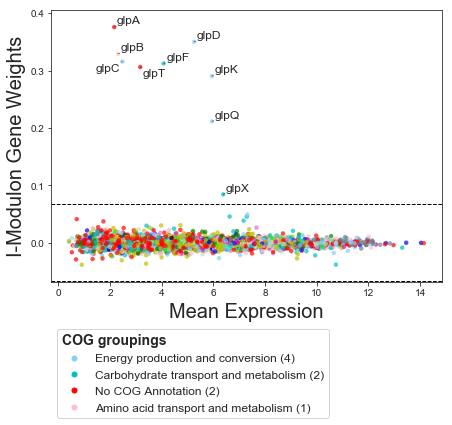

In [17]:
plot_genes(ica_data, 'GlpR')

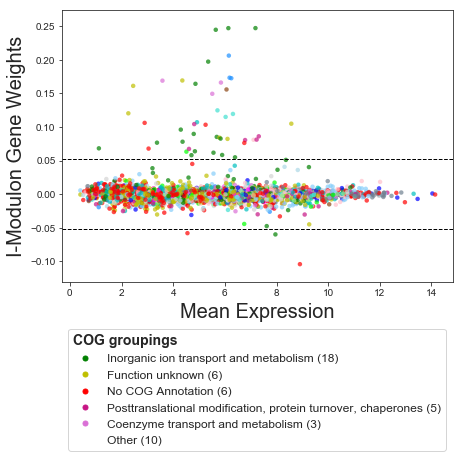

In [18]:
plot_genes(ica_data, 'Fur-1')

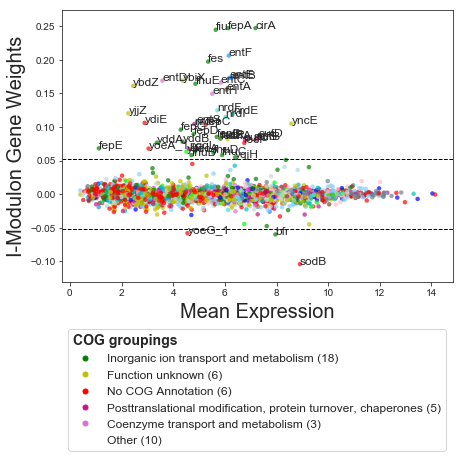

In [19]:
plot_genes(ica_data, 'Fur-1', labels=True, adjust=False)

## Plot Sample Bar Chart

`plot_samples_bar` displays the condition-specific activities of a single i-modulon across all samples

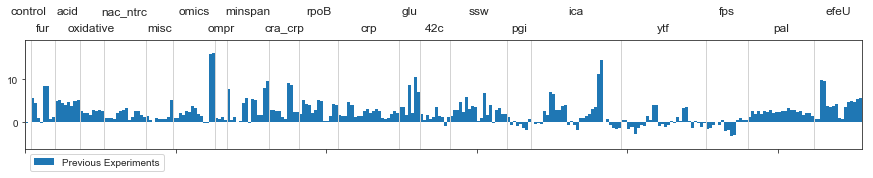

In [20]:
plot_samples_bar(ica_data, 'Pyruvate')

To highlight a specific experiment, use the `project` argument.

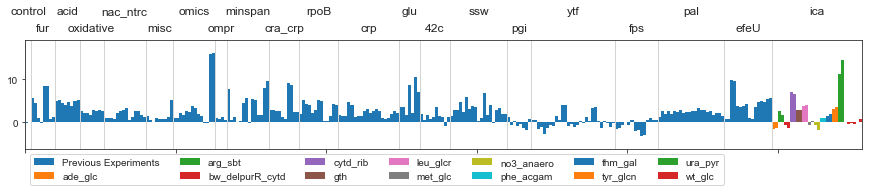

In [23]:
plot_samples_bar(ica_data, 'Pyruvate', project='ica')

You can also change the [legend formatting](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend) using `legend_args`

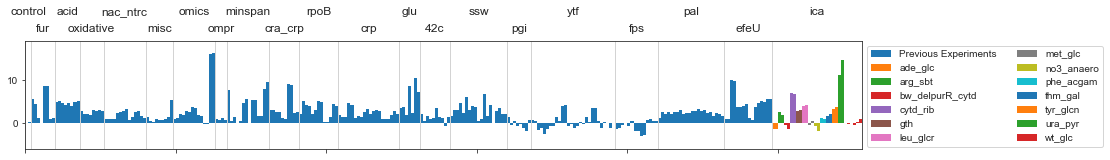

In [24]:
plot_samples_bar(ica_data, 'Pyruvate', project='ica', legend_args={
                 'ncol': 2, 'loc': 2, 'bbox_to_anchor': (1, 1)})

## Regulon Plots

If you provided TRN information, you can visualize your TRN enrichments three ways.

### Regulon Histogram

The `regulon_histogram` function displays your i-modulon with its gene names colored by a regulon.

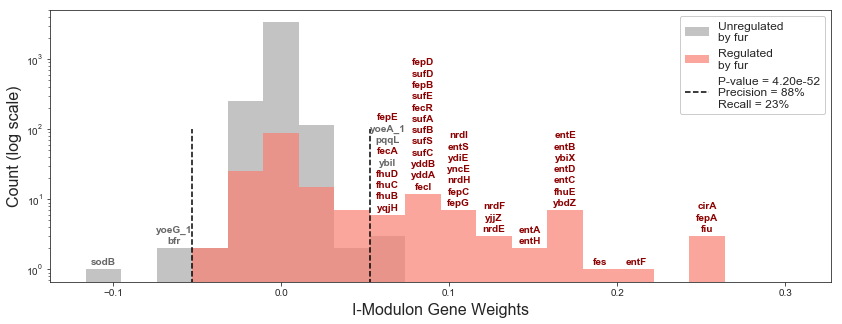

In [25]:
regulon_histogram(ica_data, 'Fur-1', 'fur')

### Regulon Venn

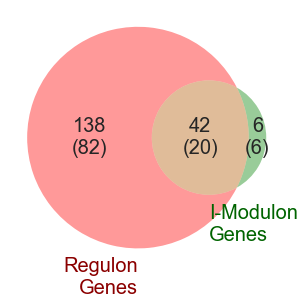

In [26]:
regulon_venn(ica_data, 'Fur-1', tf='fur')

### Regulon Scatter

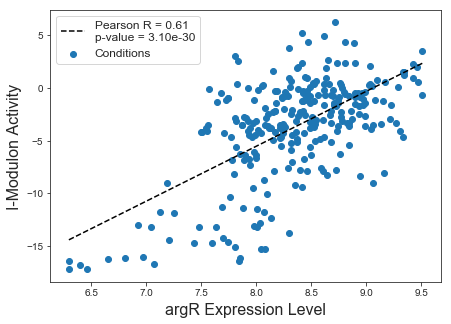

In [27]:
regulon_scatter(ica_data, 'ArgR', tf='argR')

If the regulator has no expression, an empty axis will be drawn with a warning message.

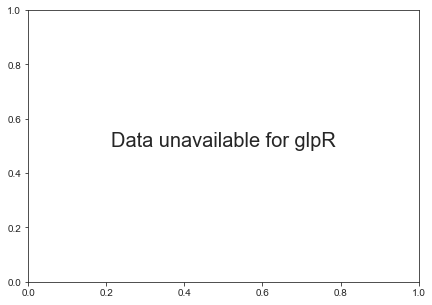

In [28]:
regulon_scatter(ica_data,'GlpR','glpR')

To get all plots for an i-modulon, use the `plot_regulon` function.
Arguments:
* `tf`: Show plot for specific regulator
* `num_regs`: Number of top enriched regulators to show (default: 1)

[(<matplotlib.axes._subplots.AxesSubplot at 0x7ff3bbae0da0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7ff3bb9c3c18>)]

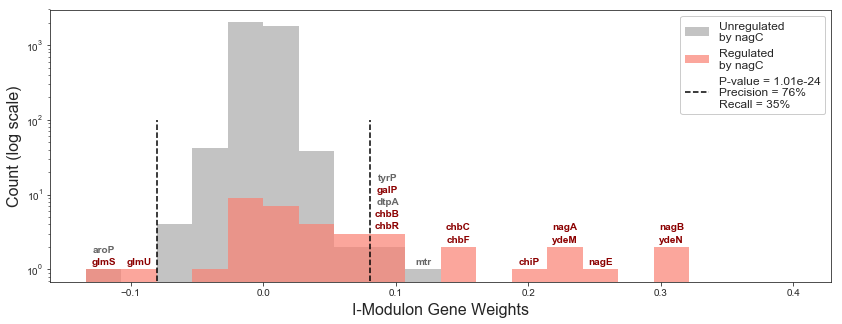

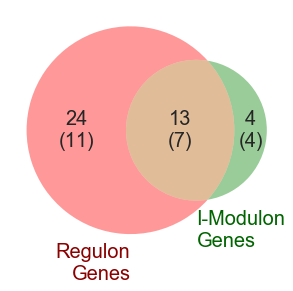

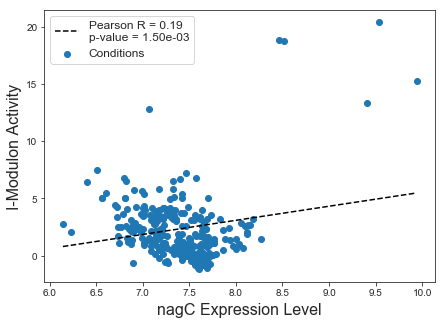

In [29]:
plot_regulon(ica_data,'NagC/TyrR')

[(<matplotlib.axes._subplots.AxesSubplot at 0x7ff3bb930978>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7ff3bb7ac710>),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7ff3bb764860>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7ff3bb6b1470>)]

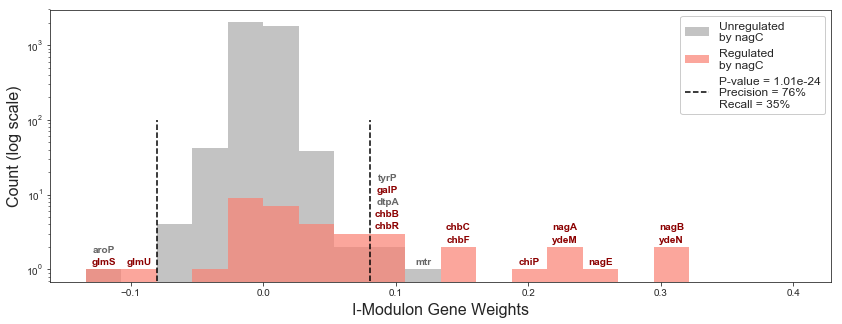

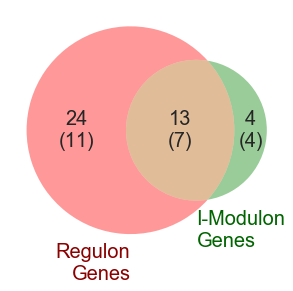

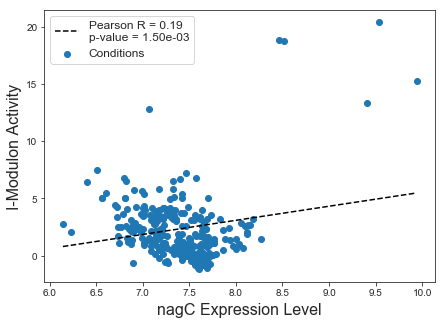

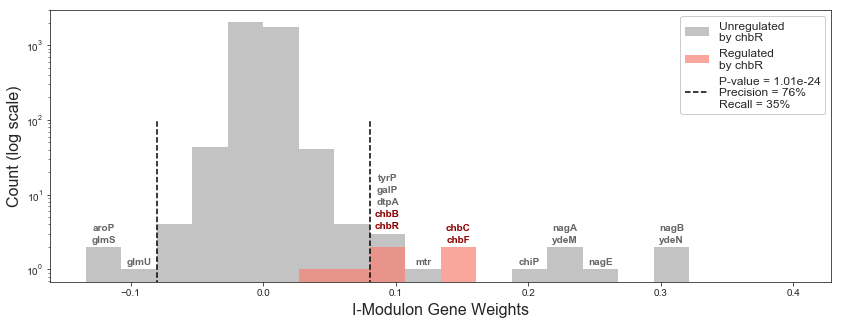

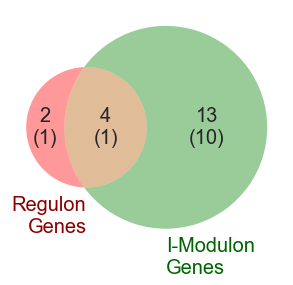

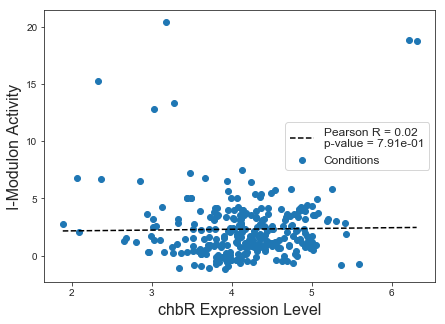

In [30]:
plot_regulon(ica_data, 'NagC/TyrR', num_regs=2)

[(<matplotlib.axes._subplots.AxesSubplot at 0x7ff3bb469e80>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7ff3bb3556a0>)]

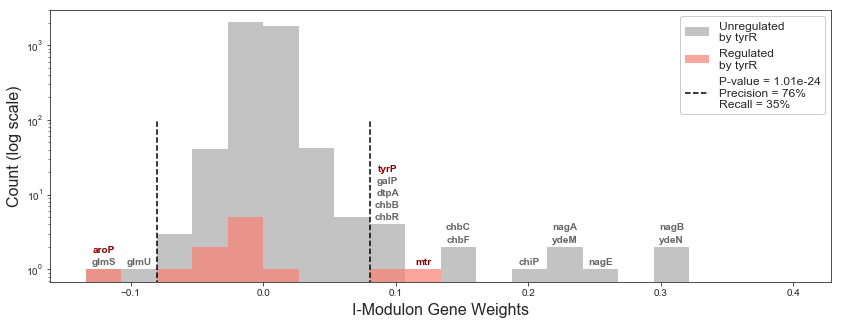

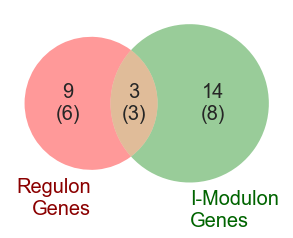

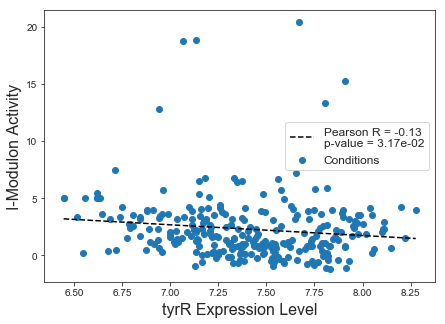

In [31]:
plot_regulon(ica_data, 'NagC/TyrR', tf='tyrR')